In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
import json

In [4]:
# trips.txt: there are multiple trips per shuttle

df_trips = pd.read_csv('./google_transit/trips.txt')
df_trips

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,777,48686.126106,670294,NaN,NaN,NaN,23714,48686,0,0
1,777,48686.126106,670295,NaN,NaN,NaN,23714,48686,0,0
2,777,48686.126106,670296,NaN,NaN,NaN,23714,48686,0,0
3,777,48686.126106,670297,NaN,NaN,NaN,23714,48686,0,0
4,777,48686.126106,670298,NaN,NaN,NaN,23714,48686,0,0
...,...,...,...,...,...,...,...,...,...,...
333,5707,48152.126137,670590,SEC Express,NaN,NaN,23728,48700,0,0
334,5707,48152.124657,670598,SEC Express,NaN,NaN,23727,48700,0,0
335,5707,48152.124657,670599,SEC Express,NaN,NaN,23727,48700,0,0
336,5707,48152.124657,670600,SEC Express,NaN,NaN,23728,48700,0,0


In [10]:
# shapes.txt: points that make the routes
df_shapes = pd.read_csv('./google_transit/shapes.txt')
df_shapes

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,48686,42.381867,-71.125325,1
1,48686,42.380436,-71.124350,2
2,48686,42.380421,-71.124387,3
3,48686,42.380187,-71.124944,4
4,48686,42.380167,-71.124994,5
...,...,...,...,...
5619,48700,42.362642,-71.124582,285
5620,48700,42.362604,-71.124607,286
5621,48700,42.362566,-71.124630,287
5622,48700,42.362443,-71.124688,288


In [31]:
# dump the coordinates for each route into a individual json files as nested lists: [[x1, y1], [x2, y2], ...]
unique_shape_ids = list(set(df_shapes['shape_id']))

count = 0
for id in unique_shape_ids:
    shape = df_shapes[df_shapes['shape_id']==id]
    lat = list(shape['shape_pt_lat'])
    long = list(shape['shape_pt_lon'])
    coords_list = []

    for index in range(len(lat)):
        x_coord = lat[index]
        y_coord = long[index]
        coords_list.append([x_coord, y_coord])
        # plt.plot(lat, long)
    # print(coords_list)
    count += 1
    with open(f'./routes/route_{count}.json', 'w') as f:
        json.dump(coords_list, f)

In [32]:
unique_shape_ids

[48675,
 48165,
 35558,
 48167,
 35560,
 35561,
 48166,
 48168,
 48169,
 48686,
 48688,
 17907,
 20695,
 48152,
 48700,
 20415]

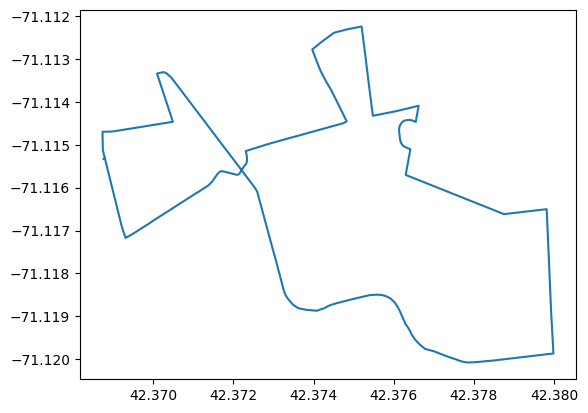

In [36]:
shape = df_shapes[df_shapes['shape_id']==48167]
lat = list(shape['shape_pt_lat'])
long = list(shape['shape_pt_lon'])
plt.plot(lat, long)